In [1]:
import pandas as pd

In [2]:
Sheet = pd.read_csv("Sheet_1.csv")

In [3]:
Sheet.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


In [4]:
Sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   response_id    80 non-null     object 
 1   class          80 non-null     object 
 2   response_text  80 non-null     object 
 3   Unnamed: 3     2 non-null      object 
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     1 non-null      object 
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 5.1+ KB


In [5]:
Sheet.describe()

,Unnamed: 4,Unnamed: 6
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [6]:
Sheet.isnull().sum()

response_id       0
class             0
response_text     0
Unnamed: 3       78
Unnamed: 4       80
Unnamed: 5       79
Unnamed: 6       80
Unnamed: 7       79
dtype: int64

In [7]:
Sheet.shape

(80, 8)

In [8]:
X = Sheet.iloc[:,2]

Y = Sheet.iloc[:,1] 

In [9]:
import tensorflow as tf

C:\Users\farja\anaconda3\envs\tf-gpu-cuda8\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [11]:
vocab_size = 10000
embedding_dim = 16
max_length = 100

In [12]:
nlp = Tokenizer(num_words=vocab_size,oov_token='<OOV>')

In [13]:
nlp.fit_on_texts(X)

In [14]:
nlp.index_word

{1: '<OOV>',
 2: 'to',
 3: 'i',
 4: 'and',
 5: 'a',
 6: 'the',
 7: 'of',
 8: 'her',
 9: 'my',
 10: 'was',
 11: 'it',
 12: 'with',
 13: 'for',
 14: 'him',
 15: 'me',
 16: 'as',
 17: 'she',
 18: 'in',
 19: 'friends',
 20: 'friend',
 21: 'that',
 22: 'have',
 23: 'when',
 24: 'through',
 25: 'people',
 26: 'he',
 27: 'but',
 28: 'about',
 29: 'be',
 30: 'helped',
 31: 'them',
 32: 'had',
 33: 'up',
 34: 'they',
 35: 'some',
 36: 'help',
 37: 'talk',
 38: 'there',
 39: 'so',
 40: 'going',
 41: 'on',
 42: 'out',
 43: 'who',
 44: 'just',
 45: 'try',
 46: 'one',
 47: 'would',
 48: 'their',
 49: 'been',
 50: 'his',
 51: 'life',
 52: 'from',
 53: 'talked',
 54: 'school',
 55: 'get',
 56: 'always',
 57: 'being',
 58: 'at',
 59: 'think',
 60: 'is',
 61: 'if',
 62: 'or',
 63: 'not',
 64: 'too',
 65: 'depression',
 66: 'problems',
 67: 'someone',
 68: 'issues',
 69: 'can',
 70: 'what',
 71: 'best',
 72: 'this',
 73: 'how',
 74: 'girl',
 75: 'much',
 76: 'because',
 77: 'shit',
 78: "i've",
 79: 'yo

In [15]:
arr = nlp.texts_to_sequences(X)


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
X = pad_sequences(arr, maxlen=max_length)
len(X[0])

100

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
l = LabelEncoder()

In [20]:
Y = l.fit_transform(Y)
Y

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [21]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [65]:
num_epochs = 600
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)

Epoch 1/600
2/2 - 0s - loss: 1.1380e-04 - accuracy: 1.0000 - val_loss: 1.0055 - val_accuracy: 0.8125
Epoch 2/600
2/2 - 0s - loss: 1.1357e-04 - accuracy: 1.0000 - val_loss: 1.0057 - val_accuracy: 0.8125
Epoch 3/600
2/2 - 0s - loss: 1.1334e-04 - accuracy: 1.0000 - val_loss: 1.0059 - val_accuracy: 0.8125
Epoch 4/600
2/2 - 0s - loss: 1.1311e-04 - accuracy: 1.0000 - val_loss: 1.0061 - val_accuracy: 0.8125
Epoch 5/600
2/2 - 0s - loss: 1.1288e-04 - accuracy: 1.0000 - val_loss: 1.0063 - val_accuracy: 0.8125
Epoch 6/600
2/2 - 0s - loss: 1.1262e-04 - accuracy: 1.0000 - val_loss: 1.0066 - val_accuracy: 0.8125
Epoch 7/600
2/2 - 0s - loss: 1.1242e-04 - accuracy: 1.0000 - val_loss: 1.0068 - val_accuracy: 0.8125
Epoch 8/600
2/2 - 0s - loss: 1.1218e-04 - accuracy: 1.0000 - val_loss: 1.0070 - val_accuracy: 0.8125
Epoch 9/600
2/2 - 0s - loss: 1.1198e-04 - accuracy: 1.0000 - val_loss: 1.0072 - val_accuracy: 0.8125
Epoch 10/600
2/2 - 0s - loss: 1.1173e-04 - accuracy: 1.0000 - val_loss: 1.0074 - val_accura

Epoch 82/600
2/2 - 0s - loss: 9.6868e-05 - accuracy: 1.0000 - val_loss: 1.0227 - val_accuracy: 0.8125
Epoch 83/600
2/2 - 0s - loss: 9.6708e-05 - accuracy: 1.0000 - val_loss: 1.0229 - val_accuracy: 0.8125
Epoch 84/600
2/2 - 0s - loss: 9.6509e-05 - accuracy: 1.0000 - val_loss: 1.0232 - val_accuracy: 0.8125
Epoch 85/600
2/2 - 0s - loss: 9.6303e-05 - accuracy: 1.0000 - val_loss: 1.0234 - val_accuracy: 0.8125
Epoch 86/600
2/2 - 0s - loss: 9.6149e-05 - accuracy: 1.0000 - val_loss: 1.0236 - val_accuracy: 0.8125
Epoch 87/600
2/2 - 0s - loss: 9.5938e-05 - accuracy: 1.0000 - val_loss: 1.0238 - val_accuracy: 0.8125
Epoch 88/600
2/2 - 0s - loss: 9.5747e-05 - accuracy: 1.0000 - val_loss: 1.0240 - val_accuracy: 0.8125
Epoch 89/600
2/2 - 0s - loss: 9.5578e-05 - accuracy: 1.0000 - val_loss: 1.0242 - val_accuracy: 0.8125
Epoch 90/600
2/2 - 0s - loss: 9.5388e-05 - accuracy: 1.0000 - val_loss: 1.0244 - val_accuracy: 0.8125
Epoch 91/600
2/2 - 0s - loss: 9.5195e-05 - accuracy: 1.0000 - val_loss: 1.0246 - v

Epoch 162/600
2/2 - 0s - loss: 8.3182e-05 - accuracy: 1.0000 - val_loss: 1.0390 - val_accuracy: 0.8125
Epoch 163/600
2/2 - 0s - loss: 8.3026e-05 - accuracy: 1.0000 - val_loss: 1.0392 - val_accuracy: 0.8125
Epoch 164/600
2/2 - 0s - loss: 8.2862e-05 - accuracy: 1.0000 - val_loss: 1.0394 - val_accuracy: 0.8125
Epoch 165/600
2/2 - 0s - loss: 8.2726e-05 - accuracy: 1.0000 - val_loss: 1.0396 - val_accuracy: 0.8125
Epoch 166/600
2/2 - 0s - loss: 8.2563e-05 - accuracy: 1.0000 - val_loss: 1.0398 - val_accuracy: 0.8125
Epoch 167/600
2/2 - 0s - loss: 8.2415e-05 - accuracy: 1.0000 - val_loss: 1.0400 - val_accuracy: 0.8125
Epoch 168/600
2/2 - 0s - loss: 8.2263e-05 - accuracy: 1.0000 - val_loss: 1.0402 - val_accuracy: 0.8125
Epoch 169/600
2/2 - 0s - loss: 8.2099e-05 - accuracy: 1.0000 - val_loss: 1.0404 - val_accuracy: 0.8125
Epoch 170/600
2/2 - 0s - loss: 8.1962e-05 - accuracy: 1.0000 - val_loss: 1.0406 - val_accuracy: 0.8125
Epoch 171/600
2/2 - 0s - loss: 8.1810e-05 - accuracy: 1.0000 - val_loss: 

Epoch 242/600
2/2 - 0s - loss: 7.1845e-05 - accuracy: 1.0000 - val_loss: 1.0550 - val_accuracy: 0.8125
Epoch 243/600
2/2 - 0s - loss: 7.1731e-05 - accuracy: 1.0000 - val_loss: 1.0552 - val_accuracy: 0.8125
Epoch 244/600
2/2 - 0s - loss: 7.1607e-05 - accuracy: 1.0000 - val_loss: 1.0554 - val_accuracy: 0.8125
Epoch 245/600
2/2 - 0s - loss: 7.1480e-05 - accuracy: 1.0000 - val_loss: 1.0556 - val_accuracy: 0.8125
Epoch 246/600
2/2 - 0s - loss: 7.1342e-05 - accuracy: 1.0000 - val_loss: 1.0558 - val_accuracy: 0.8125
Epoch 247/600
2/2 - 0s - loss: 7.1225e-05 - accuracy: 1.0000 - val_loss: 1.0560 - val_accuracy: 0.8125
Epoch 248/600
2/2 - 0s - loss: 7.1075e-05 - accuracy: 1.0000 - val_loss: 1.0562 - val_accuracy: 0.8125
Epoch 249/600
2/2 - 0s - loss: 7.0968e-05 - accuracy: 1.0000 - val_loss: 1.0564 - val_accuracy: 0.8125
Epoch 250/600
2/2 - 0s - loss: 7.0840e-05 - accuracy: 1.0000 - val_loss: 1.0566 - val_accuracy: 0.8125
Epoch 251/600
2/2 - 0s - loss: 7.0713e-05 - accuracy: 1.0000 - val_loss: 

Epoch 322/600
2/2 - 0s - loss: 6.2416e-05 - accuracy: 1.0000 - val_loss: 1.0703 - val_accuracy: 0.8125
Epoch 323/600
2/2 - 0s - loss: 6.2309e-05 - accuracy: 1.0000 - val_loss: 1.0705 - val_accuracy: 0.8125
Epoch 324/600
2/2 - 0s - loss: 6.2195e-05 - accuracy: 1.0000 - val_loss: 1.0706 - val_accuracy: 0.8125
Epoch 325/600
2/2 - 0s - loss: 6.2088e-05 - accuracy: 1.0000 - val_loss: 1.0708 - val_accuracy: 0.8125
Epoch 326/600
2/2 - 0s - loss: 6.1971e-05 - accuracy: 1.0000 - val_loss: 1.0710 - val_accuracy: 0.8125
Epoch 327/600
2/2 - 0s - loss: 6.1876e-05 - accuracy: 1.0000 - val_loss: 1.0712 - val_accuracy: 0.8125
Epoch 328/600
2/2 - 0s - loss: 6.1766e-05 - accuracy: 1.0000 - val_loss: 1.0713 - val_accuracy: 0.8125
Epoch 329/600
2/2 - 0s - loss: 6.1651e-05 - accuracy: 1.0000 - val_loss: 1.0715 - val_accuracy: 0.8125
Epoch 330/600
2/2 - 0s - loss: 6.1547e-05 - accuracy: 1.0000 - val_loss: 1.0717 - val_accuracy: 0.8125
Epoch 331/600
2/2 - 0s - loss: 6.1445e-05 - accuracy: 1.0000 - val_loss: 

Epoch 402/600
2/2 - 0s - loss: 5.4455e-05 - accuracy: 1.0000 - val_loss: 1.0850 - val_accuracy: 0.8125
Epoch 403/600
2/2 - 0s - loss: 5.4348e-05 - accuracy: 1.0000 - val_loss: 1.0852 - val_accuracy: 0.8125
Epoch 404/600
2/2 - 0s - loss: 5.4259e-05 - accuracy: 1.0000 - val_loss: 1.0854 - val_accuracy: 0.8125
Epoch 405/600
2/2 - 0s - loss: 5.4166e-05 - accuracy: 1.0000 - val_loss: 1.0856 - val_accuracy: 0.8125
Epoch 406/600
2/2 - 0s - loss: 5.4081e-05 - accuracy: 1.0000 - val_loss: 1.0858 - val_accuracy: 0.8125
Epoch 407/600
2/2 - 0s - loss: 5.3991e-05 - accuracy: 1.0000 - val_loss: 1.0860 - val_accuracy: 0.8125
Epoch 408/600
2/2 - 0s - loss: 5.3897e-05 - accuracy: 1.0000 - val_loss: 1.0861 - val_accuracy: 0.8125
Epoch 409/600
2/2 - 0s - loss: 5.3820e-05 - accuracy: 1.0000 - val_loss: 1.0863 - val_accuracy: 0.8125
Epoch 410/600
2/2 - 0s - loss: 5.3739e-05 - accuracy: 1.0000 - val_loss: 1.0865 - val_accuracy: 0.8125
Epoch 411/600
2/2 - 0s - loss: 5.3639e-05 - accuracy: 1.0000 - val_loss: 

Epoch 482/600
2/2 - 0s - loss: 4.7706e-05 - accuracy: 1.0000 - val_loss: 1.0993 - val_accuracy: 0.8125
Epoch 483/600
2/2 - 0s - loss: 4.7623e-05 - accuracy: 1.0000 - val_loss: 1.0995 - val_accuracy: 0.8125
Epoch 484/600
2/2 - 0s - loss: 4.7544e-05 - accuracy: 1.0000 - val_loss: 1.0997 - val_accuracy: 0.8125
Epoch 485/600
2/2 - 0s - loss: 4.7458e-05 - accuracy: 1.0000 - val_loss: 1.0999 - val_accuracy: 0.8125
Epoch 486/600
2/2 - 0s - loss: 4.7402e-05 - accuracy: 1.0000 - val_loss: 1.1000 - val_accuracy: 0.8125
Epoch 487/600
2/2 - 0s - loss: 4.7316e-05 - accuracy: 1.0000 - val_loss: 1.1002 - val_accuracy: 0.8125
Epoch 488/600
2/2 - 0s - loss: 4.7236e-05 - accuracy: 1.0000 - val_loss: 1.1003 - val_accuracy: 0.8125
Epoch 489/600
2/2 - 0s - loss: 4.7150e-05 - accuracy: 1.0000 - val_loss: 1.1005 - val_accuracy: 0.8125
Epoch 490/600
2/2 - 0s - loss: 4.7080e-05 - accuracy: 1.0000 - val_loss: 1.1007 - val_accuracy: 0.8125
Epoch 491/600
2/2 - 0s - loss: 4.7013e-05 - accuracy: 1.0000 - val_loss: 

Epoch 562/600
2/2 - 0s - loss: 4.1930e-05 - accuracy: 1.0000 - val_loss: 1.1132 - val_accuracy: 0.8125
Epoch 563/600
2/2 - 0s - loss: 4.1864e-05 - accuracy: 1.0000 - val_loss: 1.1134 - val_accuracy: 0.8125
Epoch 564/600
2/2 - 0s - loss: 4.1801e-05 - accuracy: 1.0000 - val_loss: 1.1136 - val_accuracy: 0.8125
Epoch 565/600
2/2 - 0s - loss: 4.1739e-05 - accuracy: 1.0000 - val_loss: 1.1137 - val_accuracy: 0.8125
Epoch 566/600
2/2 - 0s - loss: 4.1673e-05 - accuracy: 1.0000 - val_loss: 1.1139 - val_accuracy: 0.8125
Epoch 567/600
2/2 - 0s - loss: 4.1610e-05 - accuracy: 1.0000 - val_loss: 1.1141 - val_accuracy: 0.8125
Epoch 568/600
2/2 - 0s - loss: 4.1544e-05 - accuracy: 1.0000 - val_loss: 1.1142 - val_accuracy: 0.8125
Epoch 569/600
2/2 - 0s - loss: 4.1473e-05 - accuracy: 1.0000 - val_loss: 1.1144 - val_accuracy: 0.8125
Epoch 570/600
2/2 - 0s - loss: 4.1412e-05 - accuracy: 1.0000 - val_loss: 1.1145 - val_accuracy: 0.8125
Epoch 571/600
2/2 - 0s - loss: 4.1340e-05 - accuracy: 1.0000 - val_loss: 

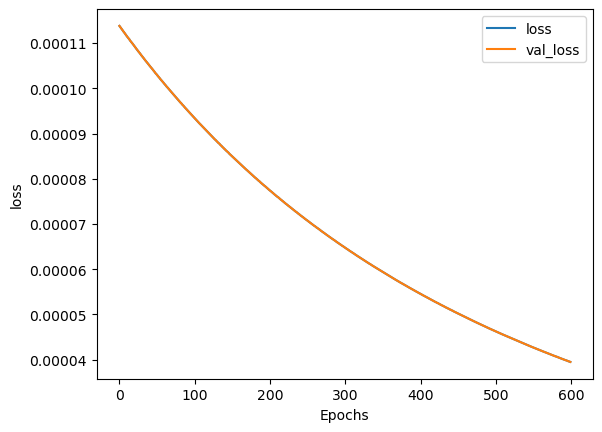

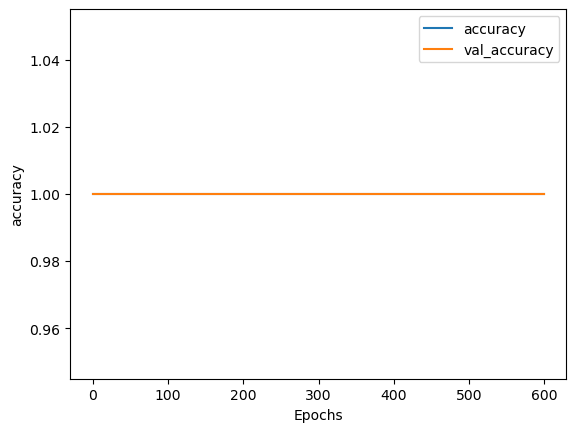

In [68]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    
    
    plt.plot(history.history[string])
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  

plot_graphs(history, "loss")
plot_graphs(history, "accuracy")

In [69]:
y_pred = model.predict(X_test)

y_pred = y_pred > 0.5 
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8125